# predict the sales for each store using Decision Tree Regressor algorithm


## Importing labaries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load the dataset

In [2]:
data = pd.read_csv(r'C:\Users\jayak\Downloads\sales data-set.csv')

### Display the first few rows of the dataframe

In [3]:
print(data.head())

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False


### A quick summary of the data columns

In [4]:
data.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


## Data Cleaning

### Find the datatypes

In [5]:
data.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

### Convert 'Date' column to datetime object

In [6]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

### Check for missing values

In [7]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64


### visualize the Weekly_sales in each store and differntiate with ISHosliday

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

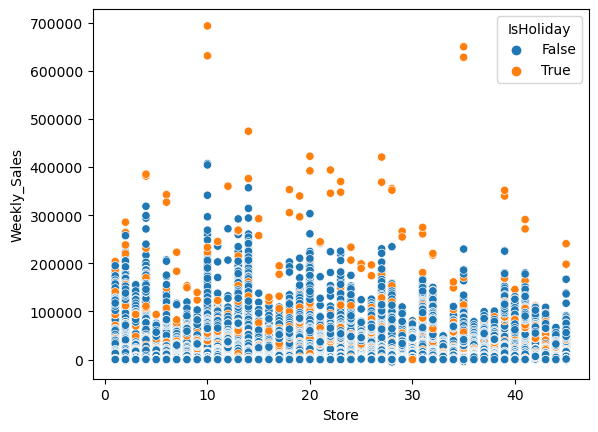

In [8]:
sns.scatterplot(x='Store', y='Weekly_Sales', data= data,  hue='IsHoliday')

### visualize the sales in each store by Box plot

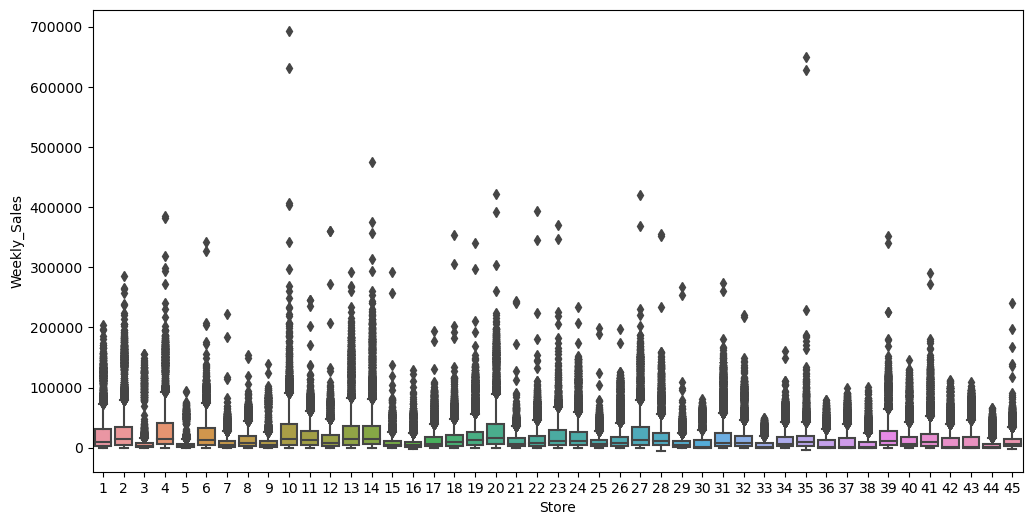

In [9]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create the box plot
sns.boxplot(x='Store', y='Weekly_Sales', data=data)

# Show the plot
plt.show()

### visualize the sales in each store Bar Plot

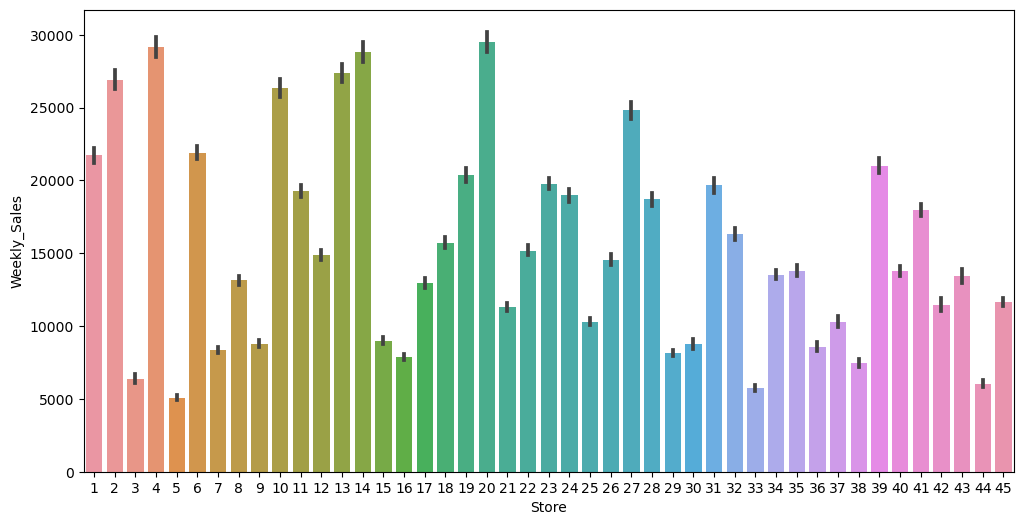

In [10]:
# Set the size of the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=data)
plt.show()

### Split the dataset into features (X) and target variable (y)

In [11]:
X = data.drop(columns=['Date', 'Weekly_Sales'])
y = data['Weekly_Sales']

### Split data into training and testing sets

In [12]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature scaling

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Training using Decision Tree Regressor

In [14]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

### Predictions on the test set

In [15]:
y_pred = model.predict(X_test_scaled)

### Evaluation metrics

In [16]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)


print("Decision Tree Regressor:")
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 score:', r2)

Decision Tree Regressor:
Mean Absolute Error: 2699.632169345715
Mean Squared Error: 51835726.43270315
Root Mean Squared Error: 7199.703218376654
R2 score: 0.9005971048425042


In [17]:
model.score(X_train_scaled, y_train)

0.911888745810931

In [18]:
model.score(X_test_scaled, y_test)

0.9005971048425042